<a href="https://colab.research.google.com/github/nurimammasri/Dicoding-Belajar-Pengembangan-Machine-Learning/blob/main/Submission%2001/Submission%2001%20-%20BBC%20News%20-%20NLP%20%5BFix%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sublission 01 - BBC News - NLP**

# **Import Library**

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
plt.style.use('seaborn')

# **Data Loading**

[BBC News Archive](https://www.kaggle.com/hgultekin/bbcnewsarchive)

News article datasets, originating from BBC News, provided for use as benchmarks for machine learning research. The original data is processed to form a single csv file for ease of use, the news title and the related text file name is preserved along with the news content and its category. This dataset is made available for non-commercial and research purposes only.

**Content**

* Consists of 2225 documents from the BBC news website corresponding to stories in five topical areas from 2004-2005.

* Class Labels: 5 (business, entertainment, politics, sport, tech)

**Columns**

* category
* filename
* title
* content







Data yang digunakan berasal dari Dataset dari kaggle yang memiliki dataset:

* bbc-news-data.csv

**use kaggle API**

## Download dataset from Kaggle

In [ ]:
# upload kaggle.json
from google.colab import files
files.upload()
# make directory and change permission
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle
# download dataset, choose 'copy api command' from kaggle dataset
!kaggle datasets download -d hgultekin/bbcnewsarchive

Saving kaggle.json to kaggle.json
kaggle.json
  0% 0.00/1.81M [00:00<?, ?B/s]
100% 1.81M/1.81M [00:00<00:00, 61.0MB/s]


In [ ]:
# test kaggle dataset list
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              234KB  2021-07-24 09:20:05           9825  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           6049  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           2238  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-07-03 18:37:20           2494  
fatiimaezzahra/famous-iconic-women                          Famous Iconic Wo

In [ ]:
# unzip
!mkdir bbcnewsarchive
!unzip bbcnewsarchive.zip -d bbcnewsarchive
!ls bbcnewsarchive

Archive:  bbcnewsarchive.zip
  inflating: bbcnewsarchive/bbc-news-data.csv  
bbc-news-data.csv


In [ ]:
# import zipfile

# zipref = zipfile.ZipFile('bbcnewsarchive.zip', 'r')
# zipref.extractall()
# zipref.close()

In [ ]:
import pandas as pd
df_news = pd.read_csv('bbcnewsarchive/bbc-news-data.csv', sep='\t')
df_news.head()

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...


**use by link**

In [ ]:
import pandas as pd
df_news = pd.read_csv('https://drive.google.com/uc?id=1dnh0C3N1geyJqFcwk-rLuF2KhRz3TePS', sep='\t')
df_news.head()

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...


**use by GitHub**

In [1]:
import pandas as pd
df_news = pd.read_csv('https://github.com/nurimammasri/Dicoding-Belajar-Pengembangan-Machine-Learning/raw/main/Submission%2001/bbc-news-data.csv', sep='\t')
df_news.head()

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...


Menampilkan daftar columns

In [ ]:
df_news.columns

Index(['category', 'filename', 'title', 'content'], dtype='object')

Pada kolom Sentiment tertera label dari tweet.

In [ ]:
df_news['category'].unique()

array(['business', 'entertainment', 'politics', 'sport', 'tech'],
      dtype=object)

Ada 2225 baris data yang berarti ada 2225 news

2 kolom yang berarti 2 columns (Features)

In [ ]:
# the shape of data
print('Total Row:', df_news.shape[0])
print('Total Columns:', df_news.shape[1])
df_news.shape

Total Row: 2225
Total Columns: 4


(2225, 4)

# **Data Visualization**

Visualisasi banyak category sentiment dari news

In [ ]:
df_news['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

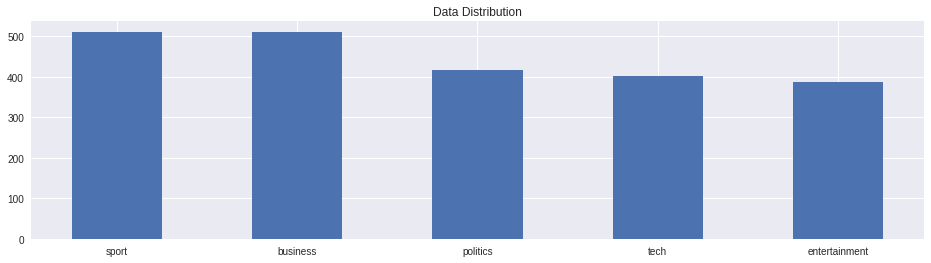

In [ ]:
fig = plt.figure(figsize=(16, 4))

category = df_news['category'].value_counts()

plt.bar(x=category.index, height=category.values, width=0.5)

plt.title('Data Distribution')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


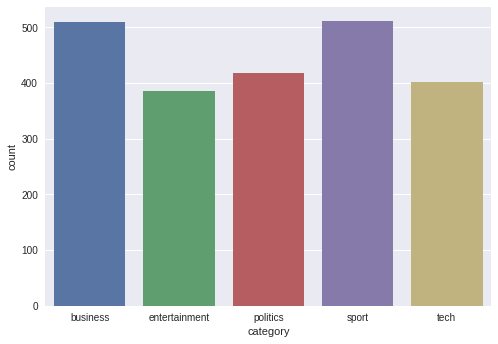

In [ ]:
sns.countplot(df_news['category'])

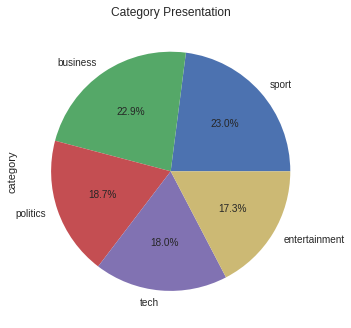

In [ ]:
category = df_news['category'].value_counts()
label = category.index
category.plot(kind='pie', labels=label, autopct='%1.1f%%')
plt.title('Category Presentation')
plt.show()

# **Data Preprocessing**

Data yang dibutuhkan sebagai features adalah 'category', 'title' dan 'content'. Maka selain itu akan di drop.

In [ ]:
df_news.head(3)

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...


In [ ]:
df_news = df_news.drop(columns=['filename'])

In [ ]:
df_news.head(2)

,category,title,content
0,business,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...


**Handling Missing Value**

Untuk mengefektifkan model dalam mempelajari data dilakukan cleaning data dari missing value. Namun dari pengecekan data tidak memiliki missing value.

In [ ]:
df_news.isnull().any()

category    False
title       False
content     False
dtype: bool

**Handling Categorical Value**

Karena label sentiment berupa data kategorikal, maka kita perlu melakukan proses one-hot-encoding. Jalankan kode di bawah untuk melakukan one-hot-encoding dan membuat dataframe baru.

In [ ]:
category = pd.get_dummies(df_news['category'])
new_df_news = pd.concat([df_news, category], axis=1)
new_df_news = new_df_news.drop(columns='category')
new_df_news.head()

,title,content,business,entertainment,politics,sport,tech
0,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,1,0,0,0,0
1,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,1,0,0,0,0
2,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...,1,0,0,0,0
3,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...,1,0,0,0,0
4,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...,1,0,0,0,0


In [ ]:
import re
from string import punctuation
# The Natural Language Toolkit
import nltk

nltk.download("stopwords")
from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

from nltk.corpus import wordnet as wn
nltk.download('averaged_perceptron_tagger')

# !pip install pyspellchecker
# from spellchecker import SpellChecker
# spell = SpellChecker()

def process_text(text):
  # Convert string to str
  text = str(text) 

  # Lowers the string
  text = text.lower()

  # correct the missplled words
  # x = text.split()
  # misspelled = spell.unknown(x)
  # result = map(lambda word : spell.correction(word) if word in  misspelled else word, x)
  # text = " ".join(result)

  # Removes the full url
  url_remove = re.compile(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?')
  text = re.sub(url_remove,' ',text)

  # Removes the punctuation
  text = ''.join([string for string in text if string not in punctuation and not string.isdigit()])

  # Removes any more special characters
  special_character = re.compile(r'[^a-zA-Z]')
  text = re.sub(special_character,' ', text)
  text = text.strip() # Strip white spaces
  text = text.split(' ')

  # Removing all stop words
  text = ' '.join([string for string in text if string not in stopwords.words('english')]) 

  # removing number
  text = re.sub('[0-9]+','',text)

  # lematization
  lemmatizer = WordNetLemmatizer()
  pos_dict = {'N': wn.NOUN, 'V': wn.VERB, 'J': wn.ADJ, 'R': wn.ADV}
  text = (' '.join([lemmatizer.lemmatize(w,pos_dict.get(t, wn.NOUN)) for w,t in nltk.pos_tag(text.split())]))

  # remove html markup
  text=re.sub("(<.*?>)","",text)
  
  # remove non-ascii and digits
  text=re.sub("(\\W|\\d)"," ",text)
    
  # remove whitespace
  text=text.strip()

  return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
new_df_news.loc[:, ['title']] = new_df_news['title'].apply(process_text)
new_df_news.loc[:, ['content']] = new_df_news['content'].apply(process_text)

In [ ]:
new_df_news.head()

,title,content,business,entertainment,politics,sport,tech
0,ad sale boost time warner profit,quarterly profit u medium giant timewarner jum...,1,0,0,0,0
1,dollar gain greenspan speech,dollar hit highest level euro almost three mon...,1,0,0,0,0
2,yukos unit buyer face loan claim,owner embattled russian oil giant yukos ask bu...,1,0,0,0,0
3,high fuel price hit ba profit,british airway blamed high fuel price drop pro...,1,0,0,0,0
4,pernod takeover talk lift domecq,share uk drink food firm allied domecq risen s...,1,0,0,0,0


**Split Data**

Selanjutnya dilakukan ektraksi data.

Maka kita tinggal mengektraksi label dan featuresnya

Prepare Feature and Label

* `feature` data set biasa disebut independent data set (X), yakni columns

* `target` data set also known as the dependent data set (Y)

Kemudian selanjutnya akan di split antara data training dan data testing

Agar dapat diproses oleh model, kita perlu mengubah nilai-nilai dari dataframe ke dalam tipe data numpy array menggunakan atribut values.

In [ ]:
news_columns = ['title', 'content']
label_columns = [column for column in new_df_news.columns if column not in news_columns]

In [ ]:
news = [",".join(item) for item in new_df_news[news_columns].values.astype(str)]
label = new_df_news[label_columns].values

Lalu, bagi data untuk training dan data untuk testing, dengan presentasi 80% Training set dan 20% Validation set.

In [ ]:
from sklearn.model_selection import train_test_split
news_train, news_test, label_train, label_test = train_test_split(news, label, test_size=0.2 ,random_state=42, shuffle = True)

**Tokenizing**

Kemudian kita ubah setiap kata pada dataset kita ke dalam bilangan numerik dengan fungsi Tokenizer. Setelah tokenisasi selesai, kita perlu membuat mengonversi setiap sampel menjadi sequence.

In [ ]:
size = 15000
embedding_dim = 32
max_len = 256
trunc_type = "post"
oov = "<OOV>"

Lebih baik gunakan oov_token yang tidak akan ada di dalam corpus kata atau datasetnya seperti `<OOV>`, `<UNK>`, dan yang lainnya sehingga word yang tidak ada di dalam tokenizer akan di gantikan dengan oov_token dan tidak merubah sequence text

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=size, oov_token=oov)
tokenizer.fit_on_texts(news_train)
 
sekuens_train = tokenizer.texts_to_sequences(news_train)
sekuens_test = tokenizer.texts_to_sequences(news_test)
 
padded_train = pad_sequences(sekuens_train, maxlen=max_len, truncating=trunc_type) 
padded_test = pad_sequences(sekuens_test, maxlen=max_len, truncating=trunc_type)

Cat :
tokenizer.fit_on_texts sebaiknya hanya digunakan untuk train set saja, karena jika dilakukan untuk test set atau semua teks yang ada di dataset maka model akan sulit memprediksi teks yang wordnya tidak ada di dalam dataset. fit_on_texts pada train_set saja itu dapat menghindari peluang overfitting https://stackoverflow.com/questions/54891464/is-it-better-to-keras-fit-to-text-on-the-entire-x-data-or-just-the-train-data

 

# **Data Modelling**

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=size, output_dim=embedding_dim, input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True)),
    # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.GlobalMaxPool1D(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 256, 32)           480000    
_________________________________________________________________
bidirectional (Bidirectional (None, 256, 512)          591872    
_________________________________________________________________
global_max_pooling1d (Global (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 1

Selanjutnya kita buat kelas callback. fungsi yang paling penting yaitu `on_epoch_end()`. Fungsi inilah yang akan kita gunakan untuk memberitahu model agar berhenti melakukan pelatihan ketika telah mencapai target.

Kode `self.model.stop_training = True` adalah kode yang memberi tahu model untuk menghentikan pelatihan.

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95 and logs.get('val_accuracy')>0.95):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 95%!")
callbacks = myCallback()

Terakhir kita dapat mulai melatih model kita dengan memanggil fungsi fit().

In [ ]:
num_epochs = 50
history = model.fit(padded_train, label_train, epochs=num_epochs, 
                    validation_data=(padded_test, label_test), callbacks=[callbacks], verbose=2) 

Epoch 1/50
56/56 - 12s - loss: 1.5872 - accuracy: 0.2489 - val_loss: 1.5357 - val_accuracy: 0.4831
Epoch 2/50
56/56 - 2s - loss: 1.2163 - accuracy: 0.4899 - val_loss: 0.8748 - val_accuracy: 0.7416
Epoch 3/50
56/56 - 2s - loss: 0.5091 - accuracy: 0.8298 - val_loss: 0.4715 - val_accuracy: 0.8697
Epoch 4/50
56/56 - 2s - loss: 0.1560 - accuracy: 0.9551 - val_loss: 0.2401 - val_accuracy: 0.9258
Epoch 5/50
56/56 - 2s - loss: 0.0326 - accuracy: 0.9921 - val_loss: 0.2638 - val_accuracy: 0.9461
Epoch 6/50
56/56 - 2s - loss: 0.0174 - accuracy: 0.9955 - val_loss: 0.2728 - val_accuracy: 0.9461
Epoch 7/50
56/56 - 2s - loss: 0.0158 - accuracy: 0.9949 - val_loss: 0.3374 - val_accuracy: 0.9213
Epoch 8/50
56/56 - 2s - loss: 0.0054 - accuracy: 0.9994 - val_loss: 0.2918 - val_accuracy: 0.9506

The accuracy of the training set and the validation set has reached > 95%!


**Plot Loss dan Akurasi**

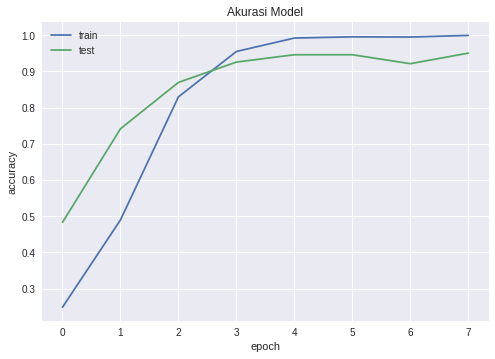

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

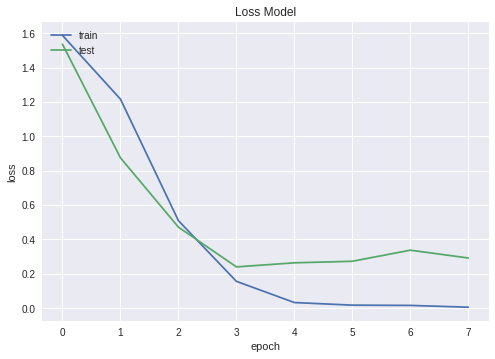

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
import random
# sentence = random.choice(news_train)
print(df_news.iloc[0, :], end='\n')
sentence = news_train[0]
sentence

category                                             business
title                       Ad sales boost Time Warner profit
content      Quarterly profits at US media giant TimeWarne...
Name: 0, dtype: object


'cole refuse blame van persie,ashley cole refused blame robin van persie leaving arsenal fullyfit striker fa cup fifth round replay sheffield united van persie suspended alongside dennis bergkamp jose antonio reyes sent southampton arsenal numerical advantage thierry henry ruled achilles tendon injury cole said noone putting blame robin something happens spur moment cole added ive done hope didnt blame anything course hell learn ive sent couple time one thing go bit crazy one two second freddie ljungberg likely used emergency striking role partnered either arturo lupoli quincy owusuabeyie jeremie aliadiere gunner bos arsene wenger said freddie option need second striker decide whether aliadiere quincy lupoli start front three involved arsenal also without winger robert pires sustained ankle injury st mary wenger added doesnt look like anything fractured good ankle sprain look like pires ready two three week'

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# sentence = 'Elon musk is good guy , he owns spacex, tesla.'

size = len(sentence.strip())
max_len = 256
trunc_type = "post"
oov = "<OOV>"
 
tokenizer = Tokenizer(num_words=size, oov_token=oov)
tokenizer.fit_on_texts([sentence])
 
sekuens = tokenizer.texts_to_sequences([sentence])
 
padded = pad_sequences(sekuens, maxlen=max_len, truncating=trunc_type) 

predicted = np.argmax(model.predict(padded), axis=-1) 
print(predicted)

if predicted == 0:
  print('Business')
elif predicted == 1:
  print('entertainment')
elif predicted == 2:
  print('politics')
elif predicted == 3:
  print('sport')
else:
  print('tech')

[2]
politics
